In [204]:
%run '../ego.py'
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.externals import joblib
%run '../preprocess.py'
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
sns.set_style('ticks');
sns.set_palette('Set1')
import json

In [2]:
pre = Preprocess(pca_model='../eco_full_pca.pkl', all_dat='../all_games.pkl')
# pre = Preprocess()
# pre.get_json('../alluser_control.json')  # uncomment this to create the pkl file needed!!
# pre.train_pca()
X, y = pre.ready_player_one(2)

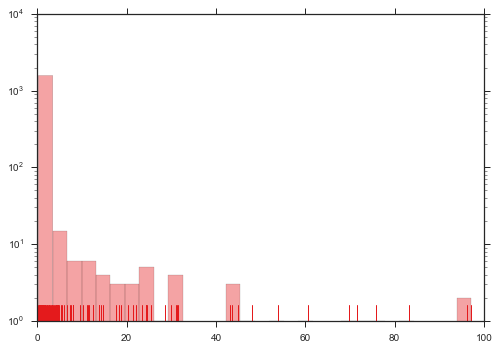

In [3]:
all_sigs = np.loadtxt('opt_sig_allplays.txt')
all_improv = np.loadtxt('opt_f_allplays.txt')

n_comp = 19
# mask = all_improv !=0
mask = np.logical_and(all_sigs[:,n_comp]>0.15, all_sigs[:,n_comp]<99.5)
sns.distplot(all_sigs[:,n_comp][mask], bins = 30, kde=False, hist_kws={'log':True}, rug = True)
# plt.plot(all_sigs[:,30])

In [4]:
all_sigs[:,30].shape

(2250L,)

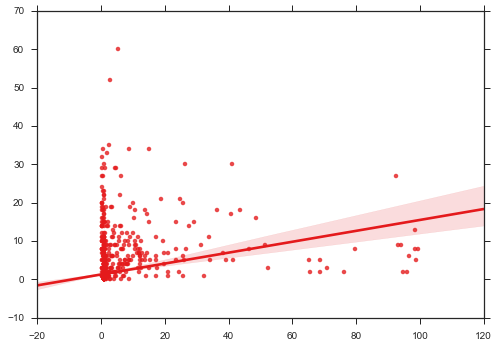

In [5]:
n_comp=30
mask = np.logical_and(all_sigs[:,n_comp]>0.15, all_sigs[:,n_comp]<99.5)
sns.regplot(all_sigs[:,n_comp][mask], -1*all_improv[mask])

In [6]:
opt_sigs = pd.DataFrame(all_sigs, columns=["comp"+str(i+1) for i in range(31)])
opt_sigs['expected'] = -1*all_improv
opt_sigs['score'] = pre.full_tab['rem_nrg'].values

In [7]:
opt_sigs

,comp1,comp2,comp3,comp4,comp5,comp6,comp7,comp8,comp9,comp10,...,comp24,comp25,comp26,comp27,comp28,comp29,comp30,comp31,expected,score
0,0.00000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,-0,0.000000
1,1.00000,1.000000,1.00,1.000000,1.000000,1.00,1.00,1.00,1.000000,1.00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,-0,0.000000
2,1.00000,1.000000,1.00,1.000000,1.000000,1.00,1.00,1.00,1.000000,1.00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,-0,0.000000
3,1.00000,1.000000,1.00,1.000000,1.000000,1.00,1.00,1.00,1.000000,1.00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,-0,0.000000
4,1.00000,1.000000,1.00,1.000000,1.000000,1.00,1.00,1.00,1.000000,1.00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,-0,5.454545
5,0.00000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,-0,0.000000
6,1.00000,1.000000,1.00,1.000000,1.000000,1.00,1.00,1.00,1.000000,1.00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,-0,14.545455
7,0.01000,0.010000,0.01,0.010000,0.010000,0.01,0.01,0.01,0.010000,0.01,...,0.010000,0.010000,0.010000,0.010000,0.010000,0.01,0.010000,1.000000,1,0.000000
8,100.00000,0.010006,0.01,0.010000,0.010000,0.01,0.01,0.01,33.943827,0.01,...,0.010000,0.010000,0.010000,0.010000,0.010000,0.01,0.010000,1.000000,6,0.000000
9,0.01000,0.010000,0.01,0.010000,0.010000,0.01,0.01,0.01,11.996901,0.01,...,0.010000,0.010000,0.010000,1.631942,0.010000,0.01,0.010000,1.000000,1,0.000000


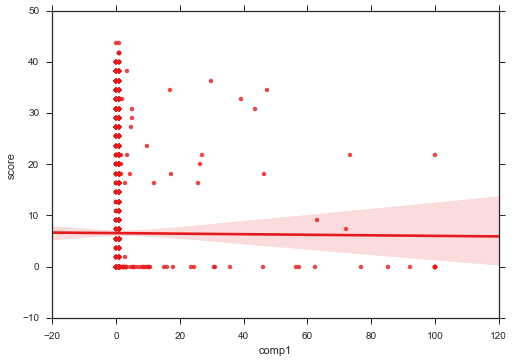

In [8]:
n_comp=1
mask = np.logical_and(all_sigs[:,n_comp]>0.15, all_sigs[:,n_comp]<99.5)
sns.regplot('comp'+str(n_comp),'score',data=opt_sigs)

In [9]:
top6 = [78, 122, 166, 70, 67, 69] #best players
m1, m2, m3, m4, m5, m6 = [pre.full_tab.userid.values==i for i in top6]
masks = [m1, m2, m3, m4, m5, m6]
p1=pre.all_dat[masks[0]]
p1_score=pre.full_tab["rem_nrg"].values[masks[0]]

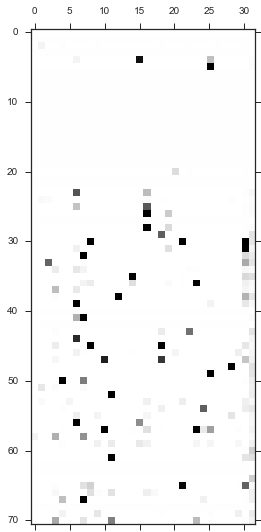

In [10]:
plt.matshow(opt_sigs[masks[2]].values[:,:-1])

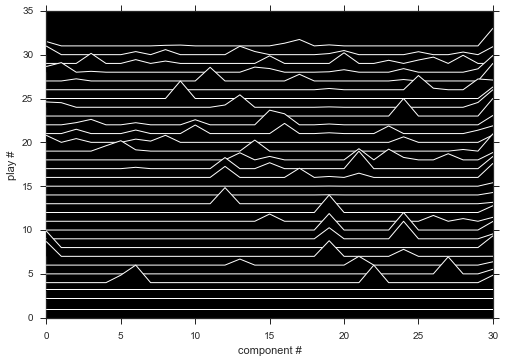

In [11]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbg='k')

for i in range(31):
    offset = 31-i
    y = np.log10(opt_sigs[masks[1]].values[-(i+1),:-2]+1)
    ax.plot(range(31),y +offset, 'w', zorder=(i+1)*2, lw=1)
    ax.fill_between(range(31), y+offset, offset, facecolor='k', lw=0, zorder=(i+1)*2-1)
    
ax.set_xlabel('component #')
ax.set_ylabel('play #')

(0, 18160)

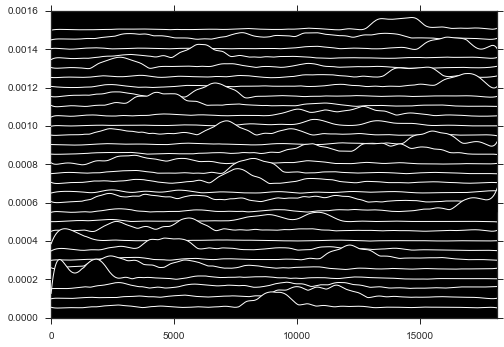

In [58]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbg='k')
for i in range(30):
    y = savgol_filter((np.abs(pre.pca.components_[i])),2501, 5 )
    offset = 0.00005*(30-i)
    ax.plot(range(18160),y +offset, 'w', zorder=(i+1)*2, lw=1)
    ax.fill_between(range(18160), y+offset, offset, facecolor='k', lw=0, zorder=(i+1)*2-1)
ax.set_xlim(0,18160)

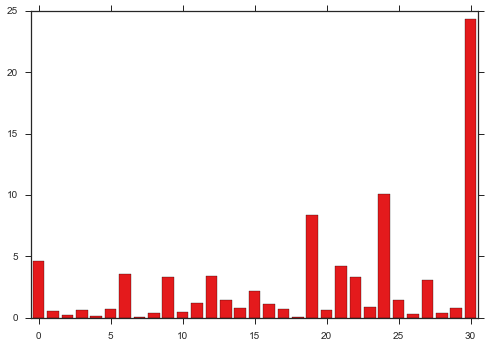

In [111]:
mean_sig = np.mean(opt_sigs[masks[1]].values[:,:-2], axis=0)
plt.bar(range(31),mean_sig, align='center')
plt.xlim(-.5,30.5);

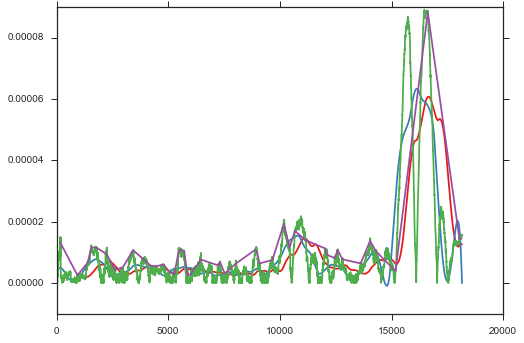

In [89]:
from scipy.signal import savgol_filter, find_peaks_cwt
plt.plot(pd.rolling_mean(np.abs(pre.pca.components_[2]), 1000, freq=4))
plt.plot(savgol_filter((np.abs(pre.pca.components_[2])),2501, 5 ))
plt.plot(np.abs(pre.pca.components_[2]))
peakind=find_peaks_cwt(np.abs(pre.pca.components_[2]),  np.arange(30,40, 1))
plt.plot(peakind, np.abs(pre.pca.components_[2][peakind]))

(0, 18160)

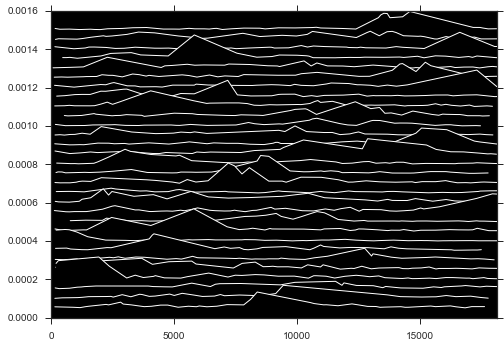

In [90]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbg='k')
for i in range(30):
#     y = savgol_filter((np.abs(pre.pca.components_[i])),2501, 5 )
    peakind=find_peaks_cwt(np.abs(pre.pca.components_[i]),  np.arange(30,40, 1))
    y = np.abs(pre.pca.components_[i][peakind])
    offset = 0.00005*(30-i)
    ax.plot(peakind,y +offset, 'w', zorder=(i+1)*2, lw=1)
    ax.fill_between(peakind, y+offset, offset, facecolor='k', lw=0, zorder=(i+1)*2-1)
ax.set_xlim(0,18160)

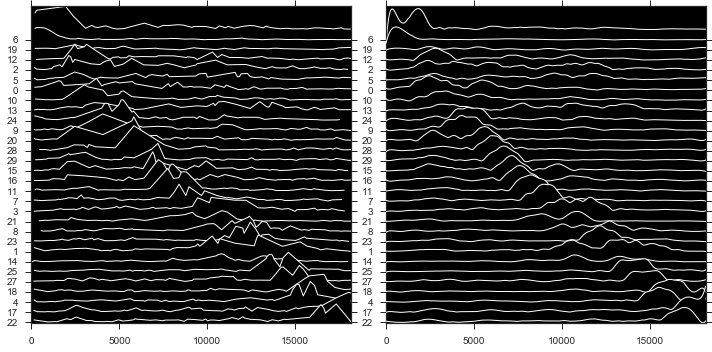

In [106]:
fig = plt.figure(facecolor='w', figsize=(10,5))
ax = fig.add_subplot(121, axisbg='k')

max_pos = np.argmax(pre.pca.components_, axis=1)
order = np.argsort(max_pos)
comp_sort = pre.pca.components_[order]

for i in range(30):
#     y = savgol_filter((np.abs(pre.pca.components_[i])),2501, 5 )
    peakind=find_peaks_cwt(np.abs(comp_sort[i]),  np.arange(25,35, 1))
    y = np.abs(comp_sort[i][peakind])
    offset = 0.00005*(30-i)
    ax.plot(peakind,y +offset, 'w', zorder=(i+1)*2, lw=1)
    ax.fill_between(peakind, y+offset, offset, facecolor='k', lw=0, zorder=(i+1)*2-1)
ax.set_xlim(0,18160)
plt.yticks([0.00005*(i) for i in np.arange(30)], [str(i) for i in np.arange(30)[order]])

ax2 = fig.add_subplot(122, axisbg='k', sharey=ax)
for i in range(30):
    y = savgol_filter((np.abs(comp_sort[i])),2501, 5 )
    offset = 0.00005*(30-i)
    ax2.plot(range(18160),y +offset, 'w', zorder=(i+1)*2, lw=1)
    ax2.fill_between(range(18160), y+offset, offset, facecolor='k', lw=0, zorder=(i+1)*2-1)
ax2.set_xlim(0,18160)
plt.tight_layout()

[26 22 17  4 18 27 25 14  1 23  8 21  3  7 11 16 15 29 28 20  9 24 13 10  0
  5  2 12 19  6]
[24  8 26 12  3 25 29 13 10 20 23 14 27 22  7 16 15  2  4 28 19 11  1  9 21
  6  0  5 18 17]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]


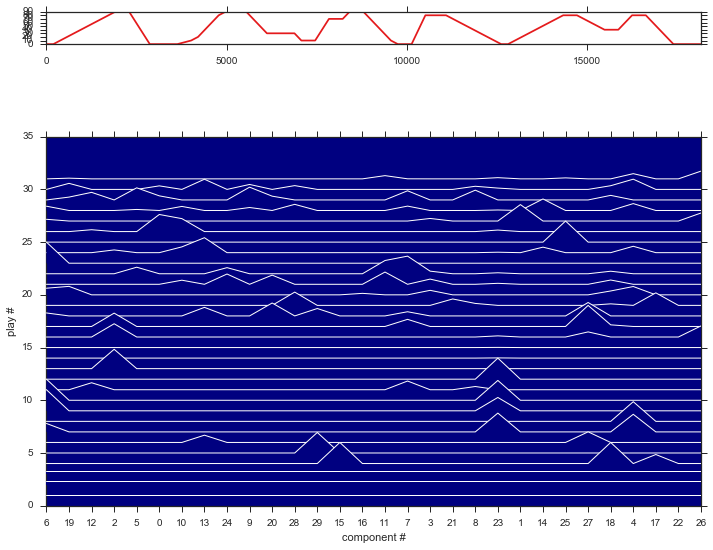

In [244]:
fig = plt.figure(facecolor='w', figsize=(10,10))
ax = fig.add_subplot(212, axisbg='navy')

max_pos = np.argmax(pre.pca.components_, axis=1)
order = np.argsort(max_pos)
x = np.arange(30)[order]
backsort = x.argsort()
print order
print backsort
sorted_x = x[backsort]
print sorted_x
for i in range(31):
    offset = 31-i
    y = np.log10(opt_sigs[masks[1]].values[-(i+1),:-3]+1)
    
    
    sorted_y = y[backsort]
    ax.plot(sorted_x,sorted_y +offset, 'w', zorder=(i+1)*2, lw=1)
    ax.fill_between(sorted_x, sorted_y+offset, offset, facecolor='navy', lw=0, zorder=(i+1)*2-1)
plt.xticks(np.arange(30), np.arange(30)[order[::-1]])
ax.set_xlabel('component #')
ax.set_ylabel('play #')
ax.set_xlim(0,29)

data = [0,0,10,20,30,40,50,60,70,80,90,90,90,60,30,0,0,0,0,0,5,10,20,40,60,80,90,90,90,90,70,50,
        30,30,30,30,30,10,10,10,40,70,70,70,90,90,90,70,50,30,10,0,0,0,40,80,80,80,80,70,60,50,40,30,20,
        10,0,0,10,20,30,40,50,60,70,80,80,80,70,60,50,40,40,40,60,80,80,80,60,40,20,0,0,0,0,0]
ax2 = fig.add_subplot(2,1,1, aspect=10.)
ax2.plot(np.linspace(0,18160,num=96), data)
ax2.set_xlim(0,18160)
plt.tight_layout()

(200L,)
(18160L,)
[ 0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1 ]


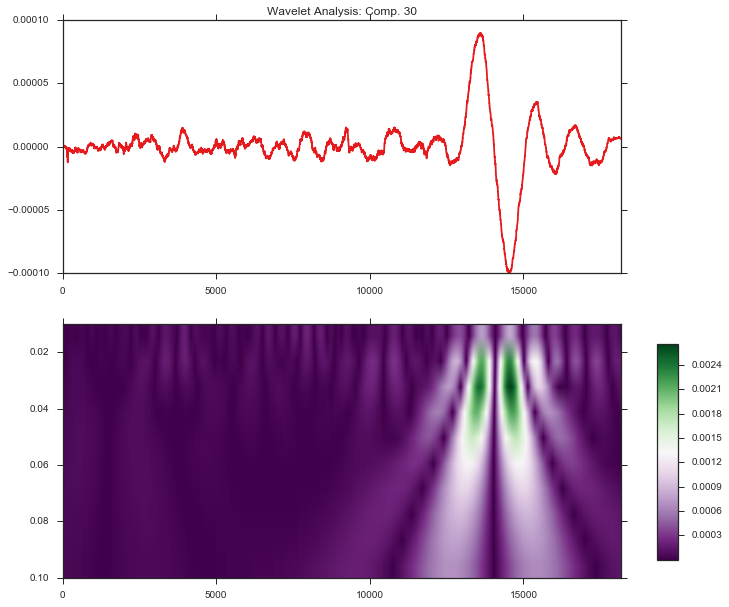

In [220]:
# %matplotlib qt
from scipy import signal
from matplotlib.colors import LogNorm
# for i in range(30):
fig,ax = plt.subplots(nrows=2, figsize=(10,10))
# t = np.linspace(0, 32, 18160, endpoint=False)
print t.shape
sig  = pre.pca.components_[0]
print sig.shape
ax[0].plot(sig)
ax[0].set_xlim(0,18160)
ax[0].set_title('Wavelet Analysis: Comp. '+str(i))
widths = np.linspace(.01, .1, num=10)
print widths
cwtmatr = signal.cwt(sig, signal.ricker, widths*len(sig))
# plt.add_subplot(2,1,2)
im=ax[1].imshow(np.abs(cwtmatr), extent=[0, 18160, .1,.01], cmap='PRGn', aspect='auto',
                vmax=abs(cwtmatr).max(), vmin=abs(cwtmatr).min())
cax = fig.add_axes([.95, 0.15, 0.03, 0.3])
fig.colorbar(im, cax=cax)

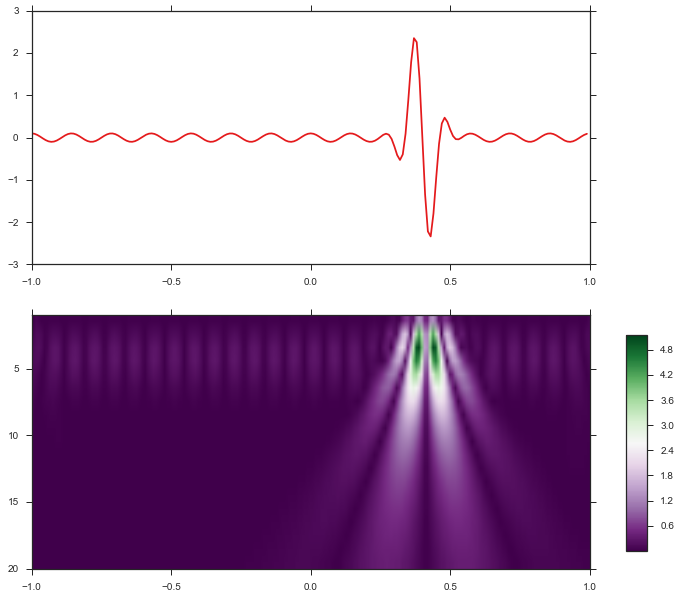

In [236]:

fig,ax = plt.subplots(nrows=2, figsize=(10,10))
t = np.linspace(-1, 1, 200, endpoint=False)
sig  = 0.1*np.cos(2 * np.pi * 7 * t) - 3*signal.gausspulse(t - 0.4, fc=8, bw=1, retquad=True)[1]
ax[0].plot(t,sig)
ax[0].set_xlim(-1,1)
widths = np.arange(1, 20)
cwtmatr = signal.cwt(sig, signal.ricker, widths)
im = ax[1].imshow(abs(cwtmatr), extent=[-1, 1, 20,1], cmap='PRGn', aspect='auto', 
           vmax=abs(cwtmatr).max(), vmin=abs(cwtmatr).min())
cax = fig.add_axes([.95, 0.15, 0.03, 0.3])
fig.colorbar(im, cax=cax)
